In [1]:
import requests
import matplotlib.pyplot as mpl
import numpy as np
import h5py
%matplotlib inline

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"9af02c30810f12be44f17ad2bd4b6510"}

sim_name = 'TNG100-1-Dark'
redshift = 0.0
base_query = f'/api/{sim_name}/snapshots/z={redshift}/'

def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r



ImportError: dlopen(/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/PIL/_imaging.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/libtiff.5.dylib
  Referenced from: <6EC808DA-A4C6-3783-8971-69BB513F7AB5> /Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/PIL/_imaging.cpython-310-darwin.so
  Reason: tried: '/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/PIL/../../../libtiff.5.dylib' (no such file), '/Users/sdbykov/opt/miniconda3/envs/venv_hea/bin/../lib/libtiff.5.dylib' (no such file), '/Users/sdbykov/opt/miniconda3/envs/venv_hea/bin/../lib/libtiff.5.dylib' (no such file), '/usr/local/lib/libtiff.5.dylib' (no such file), '/usr/lib/libtiff.5.dylib' (no such file, not in dyld cache)

# Counting haloes for a list of conditions

In [ ]:
# first convert log solar masses into group catalog units
mass_min = 10**11 / 1e10 * 0.704
mass_max = 10**15 / 1e10 * 0.704

# form the search_query string by hand for once
search_query = "?mass__gt=" + str(mass_min) + "&mass__lt=" + str(mass_max) +'&primary_flag__gt=0.9'+'&len__gr=150'

url = 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/z=0.0/'+"subhalos/" + search_query
subhalos = get(url, {'limit':20000})
print(f"{subhalos['count']} halos with search criteria \n \t {search_query}")



#get random 10 halos
np.random.seed(0)

random_idx = np.random.choice(subhalos['count'], 3, replace=False)

subhalos = [subhalos['results'][i] for i in random_idx]

subhalos = {sh['id']:sh['url'] for sh in subhalos}


16544 halos with search criteria 
 	 ?mass__gt=7.039999999999999&mass__lt=70400.0&primary_flag__gt=0.9&len__gr=150


In [ ]:
subhalos

{574424: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/574424/',
 818916: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/818916/',
 912055: 'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/912055/'}

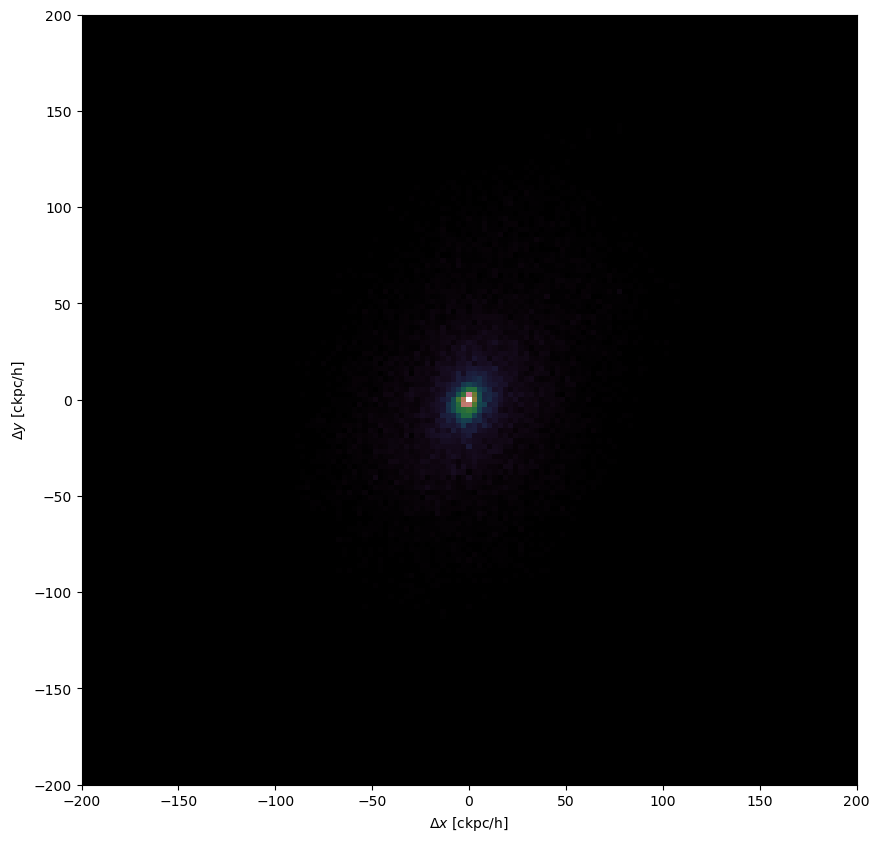

In [87]:
#def get_dm(id):
if 1:
    id = 818916
    url = subhalos[id]
    sub_prog = get(url)

    cutout_request = {'dm':'Coordinates,SubfindDMDensity'}
    cutout = get(url+"cutout.hdf5", cutout_request)

    tree = sub_prog['trees']['lhalotree_mpb']

    with h5py.File(cutout,'r') as f:
        x = f['PartType1']['Coordinates'][:,0] - sub_prog['pos_x']
        y = f['PartType1']['Coordinates'][:,1] - sub_prog['pos_y']
        z = f['PartType1']['Coordinates'][:,2] - sub_prog['pos_z']
        dens = -np.log10(f['PartType1']['SubfindDMDensity'][:])
        
        n_bins = 150
        bins = np.linspace(-200,200, n_bins)

        #aspect ratio
        
        plt.figure(figsize=(10,10))
        plt.hist2d(x,y,weights=dens,bins=[bins,bins], cmap='cubehelix')
        plt.xlabel('$\Delta x$ [ckpc/h]')
        plt.ylabel('$\Delta y$ [ckpc/h]')

        plt.show()

    

'http://www.tng-project.org/api/TNG100-1-Dark/snapshots/99/subhalos/818916/lhalotree/mpb.hdf5'

: 